In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Version on notes

In [52]:
# setup
np.random.seed(1)

S0 = 100
k1 = 105
k2 = 95
Sigma = 0.4
r = 0.05
miu = 0.1
T = 10
confidence = 0.95
n = 10000

# Call and put at time 0
d1c = (np.log(S0 / k1) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
d1p = (np.log(S0 / k2) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
c0 = S0 * stats.norm.cdf(d1c, 0, 1) - k1 * np.exp(-r * T) * stats.norm.cdf(d1c - Sigma * T**0.5, 0, 1)
p0 = -S0 * stats.norm.cdf(-d1p, 0, 1) + k2 * np.exp(-r * T) * stats.norm.cdf(-d1p + Sigma * T**0.5, 0, 1)
v0 = -c0 + p0

# Computing call and put prices after one year
T -= 1
Zt = np.random.normal(0, 1, n)
St = S0 * np.exp(miu - 0.5 * Sigma**2 + Zt * Sigma)
ct = np.zeros(n)
pt = np.zeros(n)
for i in range(n):
    d1cnew = (np.log(St[i] / k1) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
    d1pnew = (np.log(St[i] / k2) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
    ct[i] = St[i] * stats.norm.cdf(d1cnew, 0, 1) - k1 * np.exp(-r * T) * stats.norm.cdf(d1cnew - Sigma * T**0.5, 0, 1)
    pt[i] = -St[i] * stats.norm.cdf(-d1pnew, 0, 1) + k2 * np.exp(-r * T) * stats.norm.cdf(-d1pnew + Sigma * T**0.5, 0, 1)

vt = -ct + pt

# vvar is Loss 1y
vvar = v0 - vt
vvar = np.sort(vvar)
ivar = round(confidence * n)
var = vvar[ivar]
ESv = np.mean(vvar[int((confidence) * n):n])


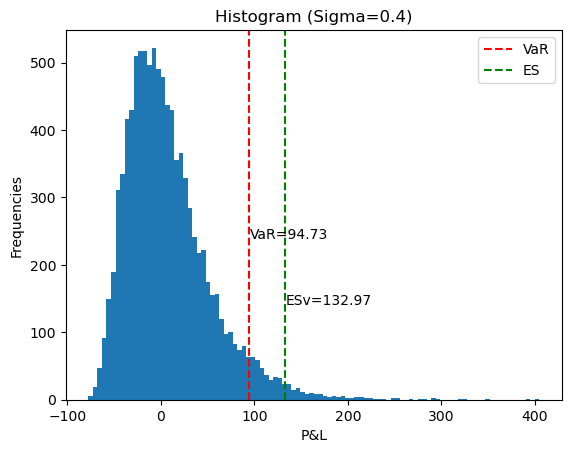

In [53]:
# plot histograms

plt.figure(1)
plt.hist(vvar, bins=100)
plt.xlabel('P&L')
plt.ylabel('Frequencies')
plt.title(f'Histogram (Sigma={Sigma:.1f})')
plt.axvline(x=var, color='r', linestyle='--', label='VaR')
plt.text(var, vvar[int(var)]+300, f'VaR={var:.2f}')
plt.axvline(x=ESv, color='g', linestyle='--', label='ES')
plt.text(ESv, vvar[int(ESv)]+200, f'ESv={ESv:.2f}')
plt.legend()
plt.show()

In [55]:
print(d1cnew, d1pnew)

0.471718232299175 0.5551211144299937


## New version

In [67]:
# setup
np.random.seed(1)

S0 = 100
k1 = 105
k2 = 95
Sigma = 0.4
r = 0.05
miu = 0.1
T = 10
confidence = 0.95
n = 10000

def risk_reversal_analysis(S0, k1, k2, Sigma, r, miu, T, confidence, n, plot=True, seed=1):
    np.random.seed(seed)
    # Call and put at time 0
    d1c = (np.log(S0 / k1) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
    d1p = (np.log(S0 / k2) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
    c0 = S0 * stats.norm.cdf(d1c, 0, 1) - k1 * np.exp(-r * T) * stats.norm.cdf(d1c - Sigma * T**0.5, 0, 1)
    p0 = -S0 * stats.norm.cdf(-d1p, 0, 1) + k2 * np.exp(-r * T) * stats.norm.cdf(-d1p + Sigma * T**0.5, 0, 1)
    v0 = -c0 + p0

    # Computing call and put prices after one year
    T -= 1
    Zt = np.random.normal(0, 1, n)
    St = S0 * np.exp(miu - 0.5 * Sigma**2 + Zt * Sigma)
    d1c_np = (np.log(St / k1) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)
    d1p_np = (np.log(St / k2) + (r + 0.5 * Sigma**2) * T) / (Sigma * T**0.5)

    ct = (St * stats.norm.cdf(d1c_np, 0, 1) - k1 * np.exp(-r * T) *
          stats.norm.cdf(d1c_np - Sigma * T**0.5, 0, 1))
    pt = (-St * stats.norm.cdf(-d1p_np, 0, 1) + k2 * np.exp(-r * T) *
          stats.norm.cdf(-d1p_np + Sigma * T**0.5, 0, 1))

    vt = -ct + pt

    # vvar is Loss 1y
    vvar = v0 - vt
    vvar = np.sort(vvar)
    ivar = round(confidence * n)
    var = vvar[ivar]
    ESv = np.mean(vvar[int((confidence) * n):n])

    if plot:
        # plot histograms
        plt.figure(1)
        plt.hist(vvar, bins=100)
        plt.xlabel('P&L')
        plt.ylabel('Frequencies')
        plt.title(f'Histogram (Sigma={Sigma:.1f})')
        plt.axvline(x=var, color='r', linestyle='--', label='VaR')
        plt.text(var, vvar[int(var)]+300, f'VaR={var:.2f}')
        plt.axvline(x=ESv, color='g', linestyle='--', label='ES')
        plt.text(ESv, vvar[int(ESv)]+200, f'ESv={ESv:.2f}')
        plt.legend()
        plt.show()

    return var, ESv

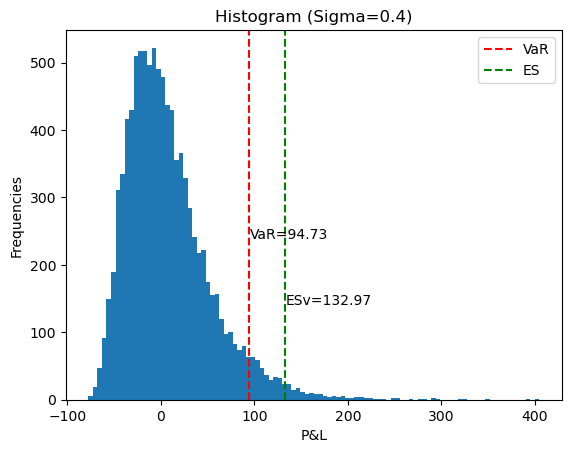

In [65]:
risk_reversal_analysis(S0, k1, k2, Sigma, r, miu, T, confidence, n, plot=True, seed=1)

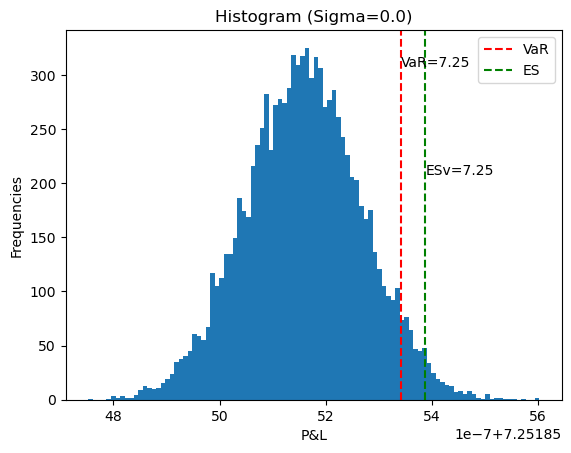

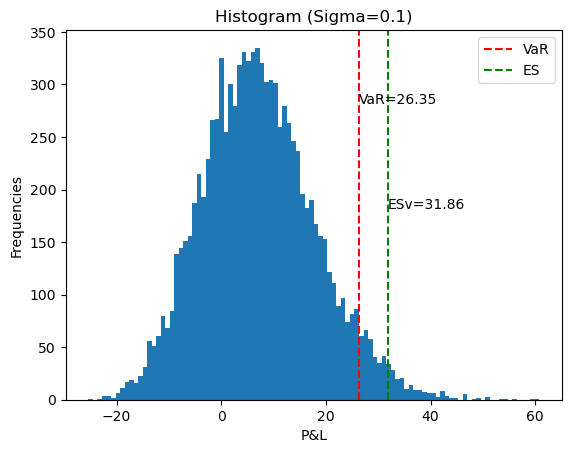

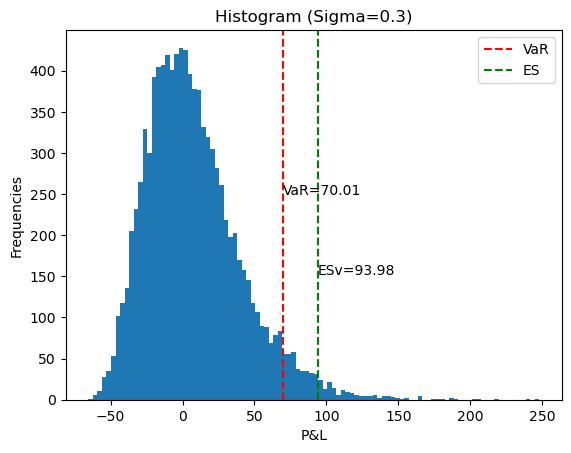

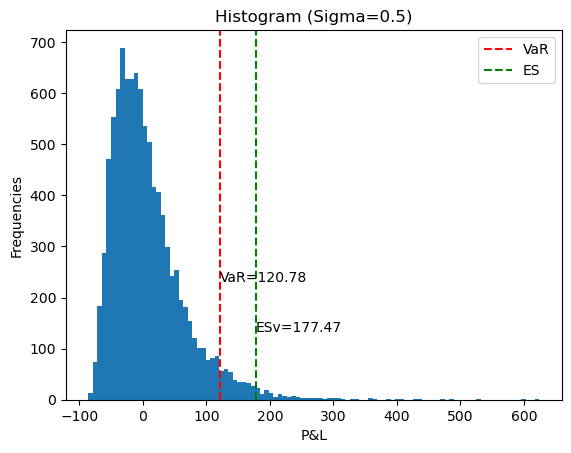

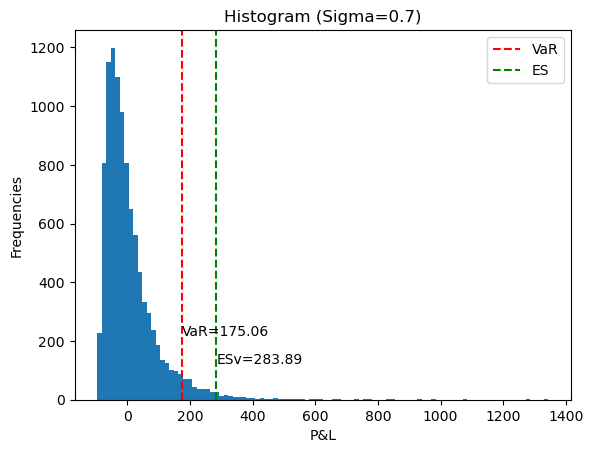

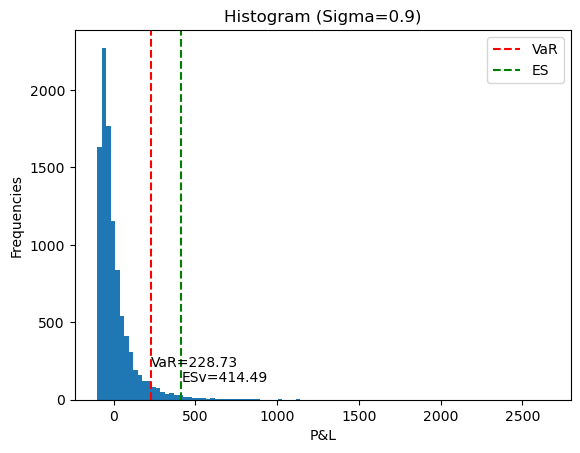

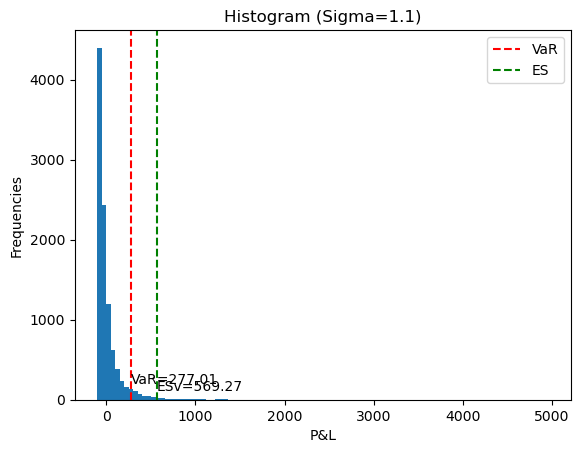

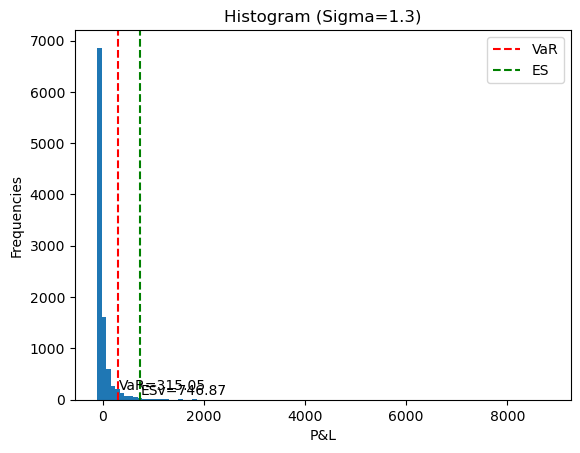

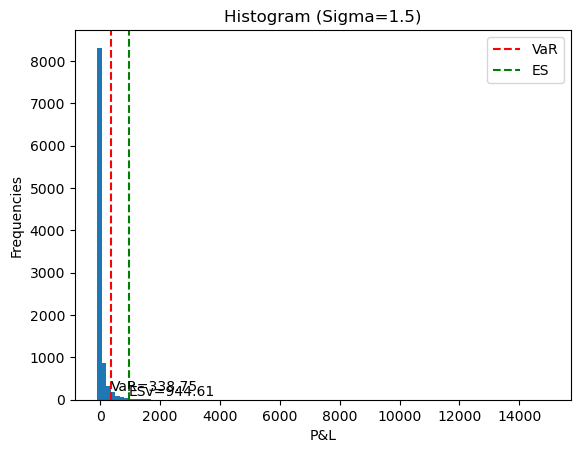

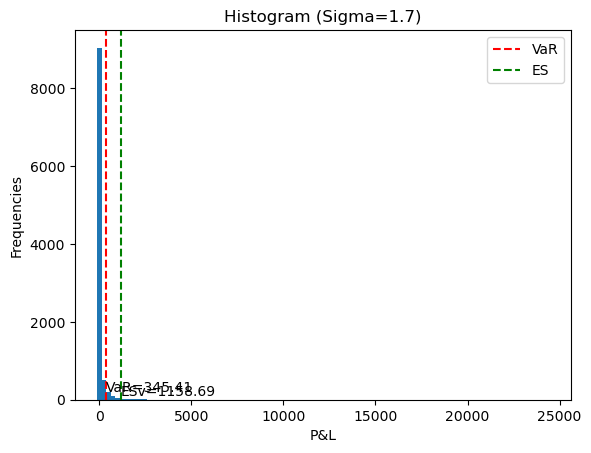

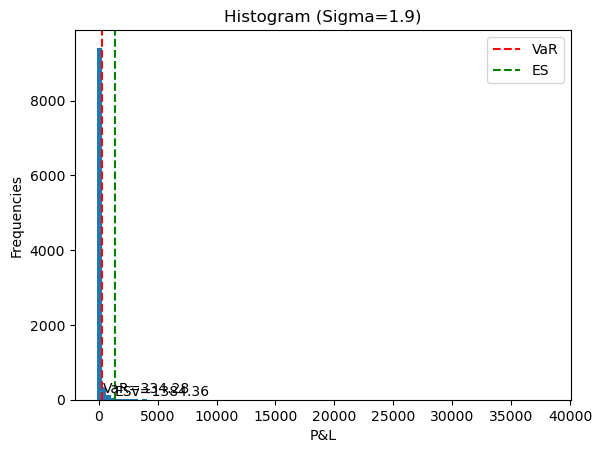

In [74]:
Sigmas = [0.000000001] + [0.1 + 0.2*r for r in range(10)]
VaR, ESv = [], []
for sig in Sigmas:
    var, es = risk_reversal_analysis(S0, k1, k2, sig, r, miu, T, confidence, n, plot=True, seed=1)
    VaR.append(var)
    ESv.append(es)

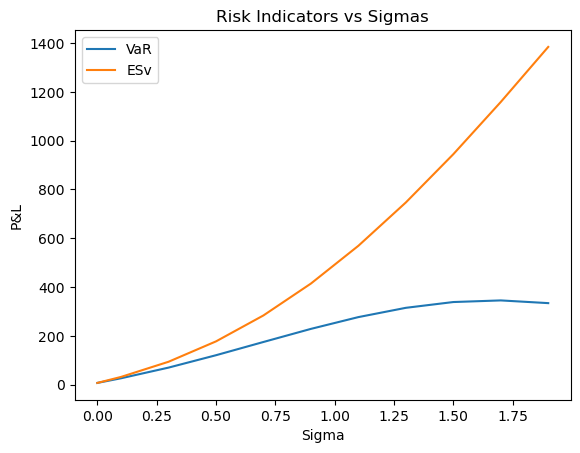

In [75]:
plt.plot(Sigmas, VaR, label='VaR')
plt.plot(Sigmas, ESv, label='ESv')
plt.xlabel('Sigma')
plt.ylabel('P&L')
plt.title('Risk Indicators vs Sigmas')
plt.legend()
plt.show()

Comments:

1. Stock prices follow log-normal distributions  -->  lower bound is limitted but upper bound is not  --> unlimited loss and skewed distribution.

2. VaR will taper off since it misidentify the extreme loss  -->  drawbacks of VaR, but ES could still measure the risk. 